In [2]:
from datasets import load_dataset
# pip3 install datasets\[audio\]

/Users/klara/Developer/Uni/SoSe24/DeepLLab/sound-separation/sound_sep-venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/klara/Developer/Uni/SoSe24/DeepLLab/sound-separation/sound_sep-venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import pandas as pd

In [4]:
#display(pd.DataFrame(load_dataset("common_voice", "tr").train).head())


In [5]:
import os
os.path.abspath(os.getcwd())

'/Users/klara/Developer/Uni/SoSe24/DeepLLab/sound-separation/data_preprocessing'

In [6]:
xcl_info = '/'.join(os.path.abspath(os.getcwd()).split('/')[:-1]) + '/data/XCL_metadata.parquet'

In [7]:
data_path = '/'.join(os.path.abspath(os.getcwd()).split('/')[:-1]) + '/data/7078499/'
print(data_path)

/Users/klara/Developer/Uni/SoSe24/DeepLLab/sound-separation/data/7078499/


In [8]:
annotations = pd.read_csv(data_path + "annotations.csv")
annotations.head()

,Filename,Start Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Species eBird Code
0,UHH_001_S01_20161121_150000.flac,6.8,8.2,2678,6053,hawama
1,UHH_001_S01_20161121_150000.flac,13.7,14.0,1362,8749,hawama
2,UHH_001_S01_20161121_150000.flac,20.7,21.1,1417,8040,hawama
3,UHH_001_S01_20161121_150000.flac,27.3,27.7,3091,5873,hawama
4,UHH_001_S01_20161121_150000.flac,28.6,28.8,3194,6594,hawama


In [9]:
recording_locations = pd.read_csv(data_path + "recording_location.csv")
recording_locations.head()

,Site,Location,GPS Coordinates,Habitat Type,Recorder
0,S01,Western slope of Maunakea in the Ka'ohe Game M...,"05 Q 226625, UTM 2191644",Dry mamane/naio forest,Wildlife Acoustics SM2
1,S02,Hakalau Forest National Wildlife Refuge,"05 Q 256809, UTM 2190241",Native montane rain forest,Wildlife Acoustics SM4 and SMMini
2,S03,Southern slope of Mauna Loa,"05 Q 228938, UTM 2154479",Subalpine/alpine,Wildlife Acoustics SM4
3,S04,Eastern slope of Maunakea,"05 Q 241471, UTM 2193519",Subalpine/alpine,Wildlife Acoustics SM4


In [10]:
species = pd.read_csv(data_path + "species.csv")
species.head()

,Species eBird Code,Scientific Name,Common Name
0,akepa1,Loxops coccineus,Hawaii Akepa
1,apapan,Himatione sanguinea,Apapane
2,barpet,Hydrobates castro,Band-rumped Storm-Petrel
3,blkfra,Francolinus francolinus,Black Francolin
4,calqua,Callipepla californica,California Quail


In [11]:
import zipfile

zipped_data_path = data_path + "soundscape_data.zip"

z = zipfile.ZipFile(zipped_data_path, "r")

i = 0
for filename in z.namelist():
    bytes = z.read(filename)
    print ('File:', filename, 'has',len(bytes),'bytes')
    i += 1
    if i > 5:
        break

File: UHH_001_S01_20161121_150000.flac has 9668716 bytes
File: UHH_002_S01_20161121_151000.flac has 9605215 bytes
File: UHH_003_S01_20161121_152000.flac has 9565210 bytes
File: UHH_004_S01_20161121_153000.flac has 9623896 bytes
File: UHH_005_S01_20161121_154000.flac has 9598109 bytes
File: UHH_006_S01_20161121_155000.flac has 9547825 bytes


In [12]:
# Import necessary libraries
import zipfile
import io
from pydub import AudioSegment
from pydub.playback import play

def play_first_ten_flac(zip_file_path):
    try:
        # Open the zip file
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Get the list of all .flac files in the zip
            flac_files = [file for file in zip_ref.namelist() if file.endswith('.flac')]
            
            if not flac_files:
                print("No .flac files found in the zip archive.")
                return
            
            # Play the first 10 .flac files
            for flac_file in flac_files[:10]:
                print(f"Playing {flac_file}")
                with zip_ref.open(flac_file) as flac_data:
                    # Read the .flac file into an audio segment
                    # FIXME: playing does not work
                    audio = AudioSegment.from_file(io.BytesIO(flac_data.read()), format="flac")
                    # Play the audio
                    play(audio)

    except zipfile.BadZipFile:
        print("Error: The provided file is not a zip file or it is corrupted.")
    except FileNotFoundError:
        print(f"Error: The file {zip_file_path} was not found.")
    # except Exception as e:
    #     print(f"An unexpected error occurred: {e}")

# Path to the zip file
zip_file_path = zipped_data_path

# Call the function to play the first 10 .flac files
#play_first_ten_flac(zip_file_path)


In [13]:
parquet_data_path = '/'.join(os.path.abspath(os.getcwd()).split('/')[:-1]) + '/data/HSN_metadata_train.parquet'

# Load the metadata from the parquet file
metadata = pd.read_parquet(parquet_data_path)
display(metadata.head())

,filepath,start_time,end_time,low_freq,high_freq,lat,long,length,call_type,sex,...,ebird_code,ebird_code_multilabel,ebird_code_secondary,quality,microphone,source,detected_events,event_cluster,recordist,peaks
id,,,,,,,,,,,,,,,,,,,,,
805337,XC805337.ogg,None,None,None,None,50.0927,18.9176,29,uncertain,"female, male",...,mallar3,[mallar3],[yellow2],A,focal,xenocanto,"[[2.112, 6.416], [9.68, 11.328], [10.592, 11.7...","[-1, -1, -1, 0, -1, 1, -1, 0, 0, 1]",Ireneusz Oleksik,"[12.678638560998488, 18.969645289822907, 21.79..."
803488,XC803488.ogg,None,None,None,None,41.2243,1.7254,12,nocturnal flight call,uncertain,...,mallar3,[mallar3],[],A,focal,xenocanto,[],[],Sergi Carreras,"[4.490167723241321, 9.626118346582038]"
800462,XC800462.ogg,None,None,None,None,63.4871,19.6912,36,"call, wing beats",None,...,mallar3,[mallar3],[],A,focal,xenocanto,"[[0.896, 7.584], [8.416, 9.088], [11.936, 13.4...","[0, 0, -1, -1, 0, 0, 0, -1, 0, 0]",Lars Edenius,"[5.868098741047005, 20.698642605003382, 22.307..."
799596,XC799596.ogg,None,None,None,None,63.4616,19.6267,52,"call, courtship calls, water splashing","female, male",...,mallar3,[mallar3],[],A,focal,xenocanto,"[[0.928, 2.704], [3.872, 7.248], [8.256, 9.84]...","[0, 0, 1, 1, -1, 0, 2, 2, -1, 1, -1, -1, 1]",Lars Edenius,"[5.861316012157072, 10.617912612355621, 36.441..."
797069,XC797069.ogg,None,None,None,None,47.0803,-0.9249,44,call,None,...,mallar3,[mallar3],[],A,focal,xenocanto,"[[6.688, 8.48], [8.944, 10.08]]","[-1, -1]",Guillaume Bigayon,"[6.868723530773357, 7.610692797199281, 8.30706..."


# XCL metadata/ columns

In [14]:
xcl_info = pd.read_parquet(xcl_info)
xcl_info.head()

,filepath,start_time,end_time,low_freq,high_freq,lat,long,length,call_type,sex,...,ebird_code,ebird_code_multilabel,ebird_code_secondary,quality,microphone,source,detected_events,event_cluster,recordist,peaks
id,,,,,,,,,,,,,,,,,,,,,
208209,XC208209.ogg,None,None,None,None,-22.6770,28.2629,26,call,None,...,ostric2,[ostric2],[rucnig1],A,focal,xenocanto,"[[5.696, 6.528]]",[-1],Jeremy Hegge,"[0.8110009479271254, 3.0774410970240234, 3.240..."
208128,XC208128.ogg,None,None,None,None,-22.6085,28.2996,4,call,None,...,ostric2,[ostric2],[],A,focal,xenocanto,"[[1.376, 2.192], [2.656, 4.32]]","[-1, -1]",Jeremy Hegge,"[1.760574316569457, 2.6865180312904804, 3.2699..."
673753,XC673753.ogg,None,None,None,None,-26.9306,26.2697,11,call,uncertain,...,ostric2,[ostric2],"[piebar1, ruvwar2, laudov1]",C,focal,xenocanto,"[[2.096, 3.536], [6.96, 8.144], [7.984, 8.688]...","[0, 0, -1, 0]",Tony Archer,"[2.7713824339657562, 7.663895557659757]"
563003,XC563003.ogg,None,None,None,None,-32.3013,24.2963,9,begging call,None,...,ostric2,[ostric2],[],C,focal,xenocanto,"[[1.04, 3.392], [4.096, 4.64], [5.136, 6.192]]","[-1, -1, -1]",Lynette Rudman,"[1.7440370185390381, 2.9388222203846732, 3.260..."
201498,XC201498.ogg,None,None,None,None,-34.3884,-55.2231,28,alarm call,None,...,grerhe1,[grerhe1],[],A,focal,xenocanto,"[[5.552, 7.2], [11.28, 13.12], [16.336, 18.592...","[0, 0, -1, -1, -1, -1]",Alvaro Riccetto,"[15.978048516808574, 19.441302259402004]"


In [15]:
xcl_info.columns

Index(['filepath', 'start_time', 'end_time', 'low_freq', 'high_freq', 'lat',
       'long', 'length', 'call_type', 'sex', 'licence', 'local_time',
       'ebird_code', 'ebird_code_multilabel', 'ebird_code_secondary',
       'quality', 'microphone', 'source', 'detected_events', 'event_cluster',
       'recordist', 'peaks'],
      dtype='object')

In [17]:
xcl_info['licence']

id
208209    //creativecommons.org/licenses/by-nc-sa/4.0/
208128    //creativecommons.org/licenses/by-nc-sa/4.0/
673753    //creativecommons.org/licenses/by-nc-sa/4.0/
563003    //creativecommons.org/licenses/by-nc-sa/4.0/
201498    //creativecommons.org/licenses/by-nc-sa/4.0/
                              ...                     
611702    //creativecommons.org/licenses/by-nc-sa/4.0/
611701    //creativecommons.org/licenses/by-nc-sa/4.0/
611700    //creativecommons.org/licenses/by-nc-sa/4.0/
611699    //creativecommons.org/licenses/by-nc-sa/4.0/
611698    //creativecommons.org/licenses/by-nc-sa/4.0/
Name: licence, Length: 492676, dtype: object

In [23]:
for col in xcl_info.columns:
    print('\n',col)
    print(xcl_info[col].head())


 filepath
id
208209    XC208209.ogg
208128    XC208128.ogg
673753    XC673753.ogg
563003    XC563003.ogg
201498    XC201498.ogg
Name: filepath, dtype: object

 start_time
id
208209    None
208128    None
673753    None
563003    None
201498    None
Name: start_time, dtype: object

 end_time
id
208209    None
208128    None
673753    None
563003    None
201498    None
Name: end_time, dtype: object

 low_freq
id
208209    None
208128    None
673753    None
563003    None
201498    None
Name: low_freq, dtype: object

 high_freq
id
208209    None
208128    None
673753    None
563003    None
201498    None
Name: high_freq, dtype: object

 lat
id
208209   -22.6770
208128   -22.6085
673753   -26.9306
563003   -32.3013
201498   -34.3884
Name: lat, dtype: float64

 long
id
208209    28.2629
208128    28.2996
673753    26.2697
563003    24.2963
201498   -55.2231
Name: long, dtype: float64

 length
id
208209    26
208128     4
673753    11
563003     9
201498    28
Name: length, dtype: int64

 c

In [41]:
continous_cols = ['lat', 'long', 'length']

In [42]:
discrete_cols = ['local_time', 'ebird_code', 'quality', 'start_time', 'end_time', 'low_freq', 'high_freq', 'call_type', 'sex', 'microphone', 'source']

In [31]:
import matplotlib.pyplot as plt
import numpy as np
img_path = '/'.join(os.path.abspath(os.getcwd()).split('/')[:-1]) + '/plots/'

In [ ]:
counts, bins = np.histogram(x)
plt.stairs(counts, bins)

/var/folders/hk/dwphr0p14vn00wrnlw8bxjpw0000gn/T/ipykernel_6170/1299234101.py:9: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.savefig(img_path + col + '.png')
/Users/klara/Developer/Uni/SoSe24/DeepLLab/sound-separation/sound_sep-venv/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


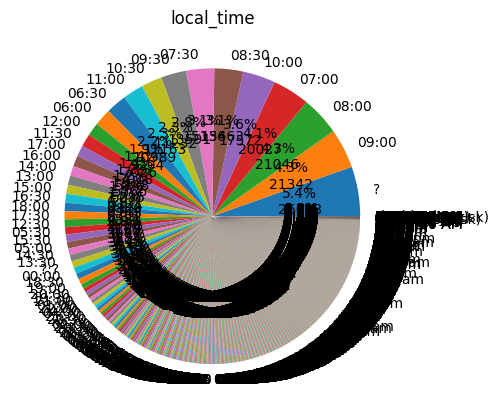

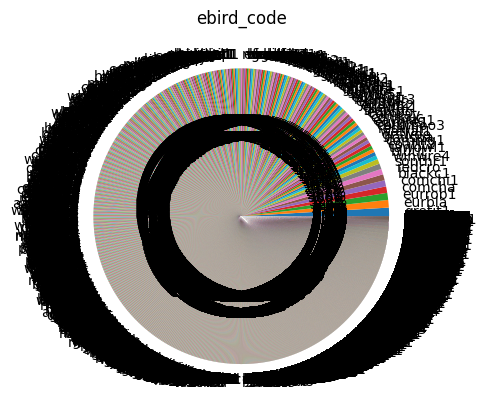

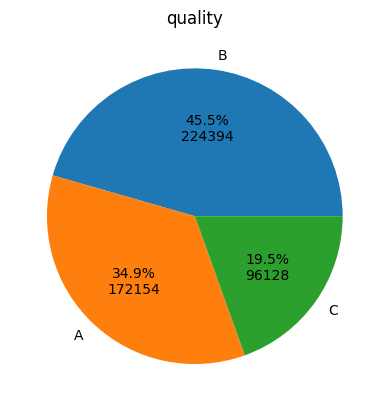

In [43]:


def fmt(x):
    return '{:.1f}%\n{:.0f}'.format(x, total*x/100)
for col in discrete_cols[:3]:
    plt.figure()
    val_counts = xcl_info[col].value_counts()
    total = val_counts.values.sum()
    plt.pie(val_counts.values, labels=val_counts.index, autopct=fmt)
    plt.title(col)
    plt.savefig(img_path + col + '.png')
    plt.show()


In [ ]:
for col in xcl_info.columns:
    print(xcl_info[col].value_counts())

filepath
XC208209.ogg    1
XC252725.ogg    1
XC381632.ogg    1
XC384608.ogg    1
XC386612.ogg    1
               ..
XC514667.ogg    1
XC530283.ogg    1
XC532282.ogg    1
XC565116.ogg    1
XC611698.ogg    1
Name: count, Length: 492676, dtype: int64
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
lat
31.9060    1402
53.9299    1342
49.6340    1272
48.2741    1152
51.6433     984
           ... 
1.3072        1
12.5750       1
19.4818       1
19.2103       1
44.6859       1
Name: count, Length: 86892, dtype: int64
long
-109.1543    1402
-2.9833      1342
 26.2213     1272
 10.8188     1150
 105.5224     979
             ... 
 2.8563         1
 16.6861        1
 3.2707         1
 6.1424         1
 5.9331         1
Name: count, Length: 91381, dtype: int64
length
10      12708
6       10616
9       10492
5       10434
7       10380
        ...  
1204        1
2129        1
1276        1
2